In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import re
warnings.filterwarnings('ignore')
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
import nltk
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud


In [2]:
resumeData = pd.read_csv("Dataset/UpdatedResumeDataSet.csv")

In [3]:
resumeData

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...


In [4]:
resumeData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


In [5]:
resumeData.describe()

,Category,Resume
count,962,962
unique,25,166
top,Java Developer,"Technical Skills Web Technologies: Angular JS,..."
freq,84,18


In [6]:
resumeData["Category"].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [7]:
resumeData["Category"].value_counts()

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64

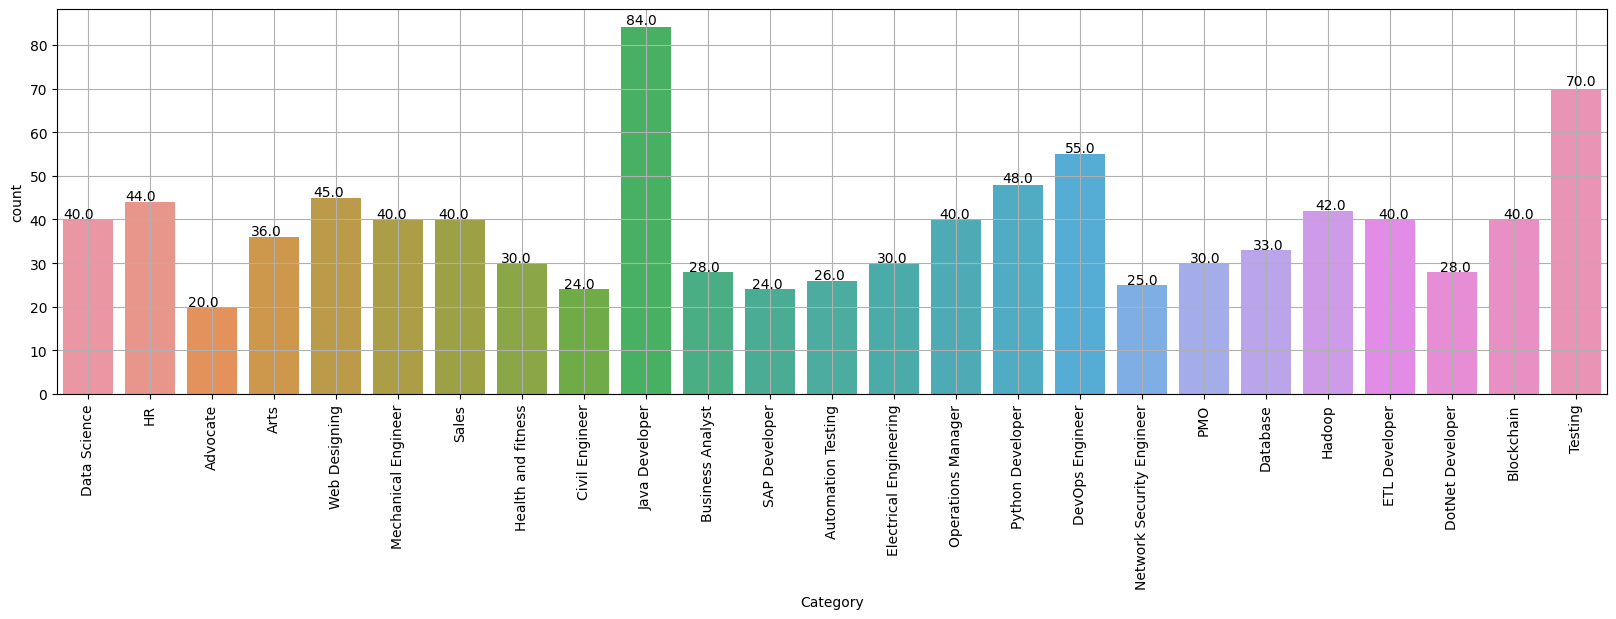

In [8]:
#Checking how many values are there in Category
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
ax = sns.countplot(x="Category", data=resumeData)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.grid()

In [9]:
def cleanText(resumeText):
    resumeText = re.sub("http/S+/s*", '', resumeText)
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) 
    resumeText = re.sub('\s+', ' ', resumeText)
    resumeText = re.sub(r'[0-9]', "", resumeText)
    return resumeText

resumeData["clean_Text"] = resumeData["Resume"].apply(lambda x: cleanText(x))


In [10]:
resumeData["clean_Text"] = resumeData["clean_Text"].apply(lambda x: x.lower())

In [11]:
resumeData

,Category,Resume,clean_Text
0,Data Science,Skills * Programming Languages: Python (pandas...,skills programming languages python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,education details may to may b e uit rgpv da...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",areas of interest deep learning control system...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,skills r python sap hana tableau sap hana sql ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",education details mca ymcaust faridabad haryan...
...,...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...,computer skills proficient in ms office word b...
958,Testing,â Willingness to accept the challenges. â ...,willingness to a ept the challenges positive ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...",personal skills quick learner eagerness to lea...
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...,computer skills software knowledge ms power po...


In [13]:
stop_words = set(stopwords.words("english")+['``',"''"])


In [14]:
sentences = resumeData['Resume'].values


In [15]:
cleanedSentences = ""
for i in sentences:
    cleanedText2 = cleanText(i)
    cleanedSentences = cleanedSentences + cleanedText2
    requiredWords = nltk.word_tokenize(cleanedText2)

In [16]:
toTal_words=[]
for word in requiredWords:
    if word not in stop_words and word not in string.punctuation:
        toTal_words.append(word)


In [17]:
word_feq = nltk.FreqDist(toTal_words)

In [18]:
word_feq

FreqDist({'Windows': 13, 'Testing': 8, 'months': 8, 'XP': 5, 'Web': 5, 'Exprience': 5, 'TESTING': 4, 'Project': 4, 'Name': 4, 'Based': 4, ...})

In [19]:
word_common = word_feq.most_common(40)

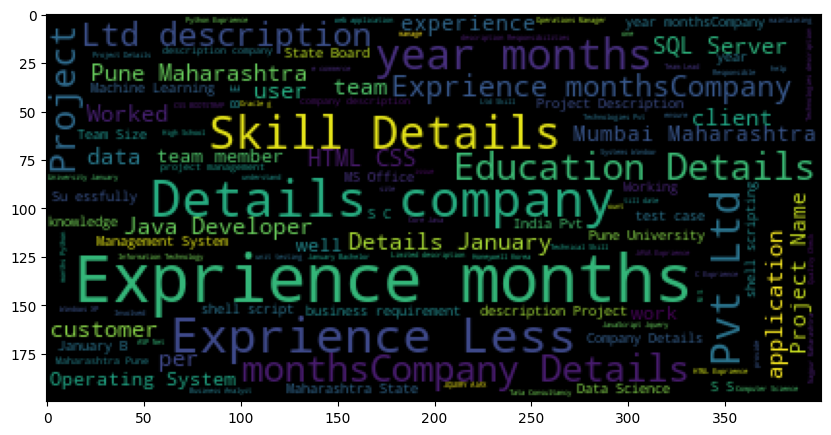

In [20]:
wc = WordCloud().generate(cleanedSentences)
plt.figure(figsize=(10, 10))
plt.imshow(wc)

In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
len(resumeData["Category"].unique())

25

In [23]:
lb = LabelEncoder()
output = lb.fit_transform(resumeData["Category"])

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

In [25]:
requiredText = resumeData['clean_Text'].values
requiredTarget = resumeData['Category'].values

In [26]:
input_Text = TfidfVectorizer()
input_Text.fit_transform(requiredText)

<962x7268 sparse matrix of type '<class 'numpy.float64'>'
	with 181221 stored elements in Compressed Sparse Row format>

TfidfVectorizer()

TypeError: Singleton array array(TfidfVectorizer(), dtype=object) cannot be considered a valid collection.

In [ ]:
clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit_tr